# Анализ оттока клиентов

**Описание проблемы**

Отток клиентов является одной из ключевых проблем, с которой сталкивается отдел маркетинга "Метанпромбанка". Несмотря на предыдущие исследования и меры по удержанию клиентов, текущие стратегии перестали быть эффективными, что связано с изменениями в клиентской базе. Для разработки новых решений требуется глубокий анализ текущих данных, выделение отточных сегментов и предоставление таргетированных рекомендаций.

**Цель проекта**

Цель данного проекта — проведение детального анализа оттока клиентов для определения сегментов с высоким уровнем оттока и разработки рекомендаций по его снижению. В конечном итоге это должно помочь маркетинговому отделу сконцентрировать усилия на наиболее уязвимых группах клиентов, что позволит сократить отток и улучшить удержание.

**Основные этапы работы**

Для достижения цели проекта будут выполнены следующие этапы:
1. **Загрузка и описание данных**: сбор данных, описание их структуры и основных характеристик.
2. **Подготовка данных**: анализ пропусков, преобразование типов данных и кодирование категориальных признаков.
3. **Исследовательский анализ данных (EDA)**: анализ распределений признаков, выявление корреляций и ключевых факторов оттока.
4. **Проверка статистических гипотез**: формулировка и проверка гипотез о влиянии различных факторов на отток.
5. **Подведение промежуточных итогов**: выделение признаков, наиболее сильно влияющих на отток.
6. **Сегментация клиентов**: разделение клиентской базы на сегменты для выявления групп с высоким уровнем оттока.
7. **Приоритизация сегментов**: оценка и расстановка приоритетов для сегментов с учетом их значимости для банка.
8. **Формирование рекомендаций**: разработка таргетированных рекомендаций для каждого сегмента.

**Ожидаемые результаты**

Результатом работы станет набор сегментов клиентов с высокой вероятностью оттока, а также подробные рекомендации по каждому сегменту, которые помогут маркетинговому отделу разработать более эффективные стратегии по удержанию клиентов. 

### Загрузка и описание данных

#### Загрузка данных

In [2]:
pip install phik

     |████████████████████████████████| 686 kB 1.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
# импортируем библиотеки, которыми будем пользоваться в проекте
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
import scipy.stats as stats
import numpy as np

In [4]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
display(df.head())
display(df.info())

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

Исходя из информации о датафрейме, можно заметить, что пропусков не так много, хотя в столбце balance около 25% попусков. Проанализируем это на этапе подготовки данных.

#### Описание данных:

   - `USERID` — уникальный идентификатор пользователя.
   - `score` — баллы кредитного скоринга.
   - `city` — город проживания клиента.
   - `gender` — пол клиента.
   - `age` — возраст клиента.
   - `equity` — количество баллов собственности клиента.
   - `balance` — баланс на счёте клиента.
   - `products` — количество продуктов, которыми пользуется клиент.
   - `credit_card` — наличие кредитной карты.
   - `last_activity` — активность клиента.
   - `EST_SALARY` — заработная плата клиента.
   - `churn` — статус оттока (ушел или остался).

In [5]:
print('Количество уникальных пользователей:', df['USERID'].nunique())

Количество уникальных пользователей: 9927


In [6]:
print('Количество уникальных оценок кредитного скоринга', df['score'].sort_values().nunique())
print('Минимальный кредитный рейтинг:', df['score'].min())
print('Максимальный кредитный рейтинг:', df['score'].max())

Количество уникальных оценок кредитного скоринга 348
Минимальный кредитный рейтинг: 642.0
Максимальный кредитный рейтинг: 1000.0


Всего 348 значений кредитного скоринга от 642 до 1000.

In [7]:
print('Список городов и количество пользователей из этих городов:')
print(df['city'].value_counts())

Список городов и количество пользователей из этих городов:
Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64


Пользователи представлены из трёх городов (Ярославль, Рыбинск, Ростов), большинство из которых проживает в Ярославле.

In [8]:
print(df['gender'].value_counts())

М    5005
Ж    4995
Name: gender, dtype: int64


Пользователей мужского и женского пола примерно поровну.

In [9]:
print('Количество уникальных возрастов', df['age'].sort_values().nunique())
print('Минимальный возраст:', df['age'].min())
print('Максимальный возраст:', df['age'].max())

Количество уникальных возрастов 68
Минимальный возраст: 18.0
Максимальный возраст: 86.0


В датафрейме есть пользователи разных возрастов от 18 до 86.

In [10]:
print('Количество уникальных баллов собственности', df['equity'].sort_values().nunique())
print('Минимальный балл собственности:', df['equity'].min())
print('Максимальный балл собственности:', df['equity'].max())

Количество уникальных баллов собственности 10
Минимальный балл собственности: 0
Максимальный балл собственности: 9


Всего 10 баллов собственности - от 0 до 9.

In [11]:
print('Количество значений в колонке с количеством продуктов', df['products'].sort_values().nunique())
print('Минимальное количество продуктов:', df['products'].min())
print('Максимальное количество продуктов:', df['products'].max())

Количество значений в колонке с количеством продуктов 6
Минимальное количество продуктов: 0
Максимальное количество продуктов: 5


Клиент может использовать от 0 до 5 продуктов.

In [12]:
print('Значения в столбце credit_card')
print(df['credit_card'].value_counts())

print('Значения в столбце last_activity')
print(df['last_activity'].value_counts())

print('Значения в столбце churn')
print(df['churn'].value_counts())

Значения в столбце credit_card
1    6804
0    3196
Name: credit_card, dtype: int64
Значения в столбце last_activity
1    5235
0    4765
Name: last_activity, dtype: int64
Значения в столбце churn
0    8180
1    1820
Name: churn, dtype: int64


Столбцы credit_card, last_activity и churn имеют бинарный вид и принимают значения 0 или 1. 

In [13]:
print('Столбец с заработной платой имеет следующее распределение:')
df['EST_SALARY'].describe()

Столбец с заработной платой имеет следующее распределение:


count    1.000000e+04
mean     1.478669e+05
std      1.393885e+05
min      2.546300e+03
25%      7.525190e+04
50%      1.196581e+05
75%      1.745005e+05
max      1.395064e+06
Name: EST_SALARY, dtype: float64

Из предыдущих шагов видно, что с типами данных все в порядке, но, на мой взгляд, следует изменить названия столбцов USERID и EST_SALARY для приведения всех столбцов к одному стилю.

 #### Переименование столбцов для более удобной работы.

In [14]:
df = df.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'})
display(df.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Подготовка данных

####  Анализ и обработка пропусков

In [15]:
df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Всего у нас 2321 пропуск - 2295 в колонке balance, и 26 в age. Пропуски во второй колонке, на мой взгляд, можно оставить, так как их слишком мало, чтобы как-либо повлиять на результаты анализа. А вот природу пропусков в balance лучше изучить подробнее.

In [16]:
# создание нового признака для пропусков в balance
df['balance_is_null'] = df['balance'].isnull().astype(int)
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_null
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0


In [17]:
# сравнение средних значений для других признаков в зависимости от наличия пропусков в balance
mean_values = df.groupby('balance_is_null').mean()
display(mean_values)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
balance_is_null,,,,,,,,,,
0,171738.837508,843.73926,42.924366,3.395068,827794.30651,2.080986,0.640104,0.515769,124501.872366,0.234523
1,172069.447930,865.35207,42.093023,0.050980,NaN,1.162092,0.815686,0.549455,226310.208654,0.005664


In [18]:
# расчет корреляции между новым признаком и другими признаками
correlations = df.corr()['balance_is_null'].sort_values(ascending=False)
display(correlations)

balance_is_null    1.000000
est_salary         0.307154
credit_card        0.158334
score              0.138871
last_activity      0.028362
user_id            0.004125
age               -0.028659
churn             -0.249421
products          -0.487512
equity            -0.709951
balance                 NaN
Name: balance_is_null, dtype: float64

Как можно увидеть, пропущенные значения balance в большинстве своем не коррелируют с другими значениями столбцов, а средние значения у пользователей с пропусками и без мало чем различаются, лишь несколько признаков имеют корреляцию с пропусками - это equity, products и небольшая корреляция с est_salary, но лучше пока не заполнять пропуски на основе зачений в этих столюцах, так как природа такой корреляции может быть случайна, поэтому это требует дополнительного исследования. 

Исходя из низкой корреляции почти со всеми признаками, можно сделать вывод, что природа пропусков случайна (MAR) в связи со столбцами age, user_id, last_activity, churn, scpre, credit_card. Но, в связи с высокой корреляцией со столбцами equity, products, мы не можем назвать их случайными и просто отбрасывать или заполнять, так как это может исказить данные, поэтому **природа пропусков MNAR (missing not at random) - пропуски не трогаем**.

#### Проверка и приведение типов данных

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          10000 non-null  int64  
 1   score            10000 non-null  float64
 2   city             10000 non-null  object 
 3   gender           10000 non-null  object 
 4   age              9974 non-null   float64
 5   equity           10000 non-null  int64  
 6   balance          7705 non-null   float64
 7   products         10000 non-null  int64  
 8   credit_card      10000 non-null  int64  
 9   last_activity    10000 non-null  int64  
 10  est_salary       10000 non-null  float64
 11  churn            10000 non-null  int64  
 12  balance_is_null  10000 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 1015.8+ KB


С типами данных все в порядке, поэтому типы данных не нуждаются в изменениях.

 ####  Исследование и удаление дубликатов

In [20]:
df.duplicated().sum()

0

Явных дубликатов не наблюдается. Проверим датафрейм на неявные дубликаты.

In [21]:
df['user_id'].duplicated().sum()

73

Всего 73 одинаковых id. Выведем на экран несколько дубликатов.

In [22]:
display(df[df['user_id'].duplicated()])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_null
1583,190253,726.0,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0,1
1837,210662,896.0,Рыбинск,Ж,37.0,0,NaN,2,0,0,90916.04,0,1
2138,131419,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0,1
2302,220816,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0,0
9785,168998,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0,0
9819,140934,832.0,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0,0
9880,217412,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0,0


In [23]:
df[df['user_id'] ==190253]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_null
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1,0
1583,190253,726.0,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0,1


In [24]:
df[df['user_id'] ==210662]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_null
869,210662,962.0,Ярославль,Ж,54.0,5,5069231.39,1,1,1,955144.85,1,0
1837,210662,896.0,Рыбинск,Ж,37.0,0,NaN,2,0,0,90916.04,0,1


In [25]:
df[df['user_id'] ==131419]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_null
904,131419,934.0,Ярославль,М,35.0,5,2348335.95,2,0,0,217105.13,1,0
2138,131419,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0,0


Во некоторых случаях у пользователей разный пол, а также во всех случаях у дубликатов разные города. Это может говорить о том, что в разных городах могут использоваться одинаковые id. Проверим это.

In [26]:
df.duplicated(['user_id','city']).sum()

0

Как выяснилось, неявные дубликаты в данном случае никак не искажают данные, так как одинаковые id принадлежат разным пользователям из разных городов - в купе с отсутствием явных дубликатов, мы можем больше не трогать данные и **не удалять дубликаты**.

  #### Кодирование категориальных данных

Подготовим данные для корреляционного анализа, преобразуем категориальные признаки в числовой формат.

In [27]:
df_encoded = pd.get_dummies(df, columns=['city', 'gender'])
df_encoded['city'] = df['city']
df_encoded['gender'] = df['gender']
df_encoded.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_null,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,city,gender
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,0,0,1,0,1,0,Рыбинск,Ж
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,0,0,1,0,1,0,Рыбинск,Ж
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,1,0,1,0,1,0,Рыбинск,Ж
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,0,1,1,0,Ярославль,Ж
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,0,0,1,0,1,Ярославль,М


Данные подготовлены, также в копии оригинального датафрейма с кодировкой (df_encoded) были сохранены оригинальные столбцы - город и пол. Перейдем к исследовательскому анализу данных.

### Исследовательский анализ данных (EDA)

####  Анализ распределения признаков

Перед построением графиков следует удалить выбросы. Исходя из практики, в большинстве случаев выбросы находятся в распределении баланса и доходов, поэтому стоит рассмотреть эти колонки.

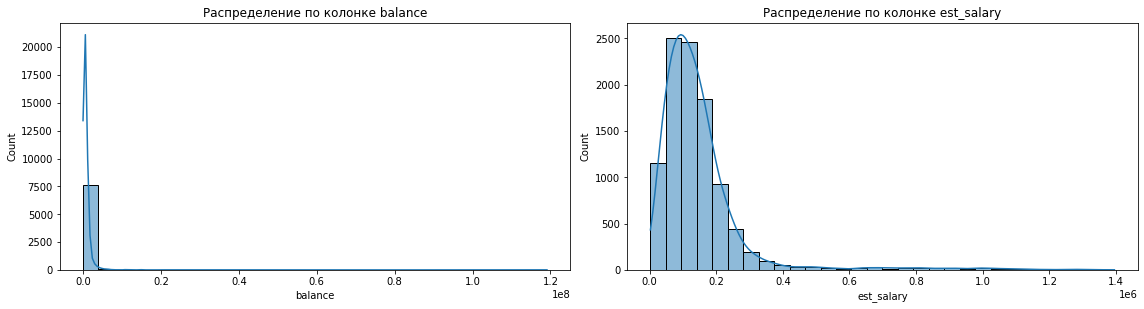

In [28]:
plt.figure(figsize=(16, 12))

for i, column in enumerate(['balance', 'est_salary']):
    plt.subplot(3, 2, i+1)  
    sns.histplot(df_encoded[column], kde=True, bins=30)  
    plt.title(f'Распределение по колонке {column}') 

plt.tight_layout()
plt.show()

Как мы видим, баланс в большинстве случаев не превышает двух миллионов, а зарплата 400 тысяч, отфильтруем датафрейм в соответствии с этим.

In [29]:
df_filtered = df_encoded[(df_encoded['balance'] <= 2000000) & (df['est_salary'] <= 400000)]

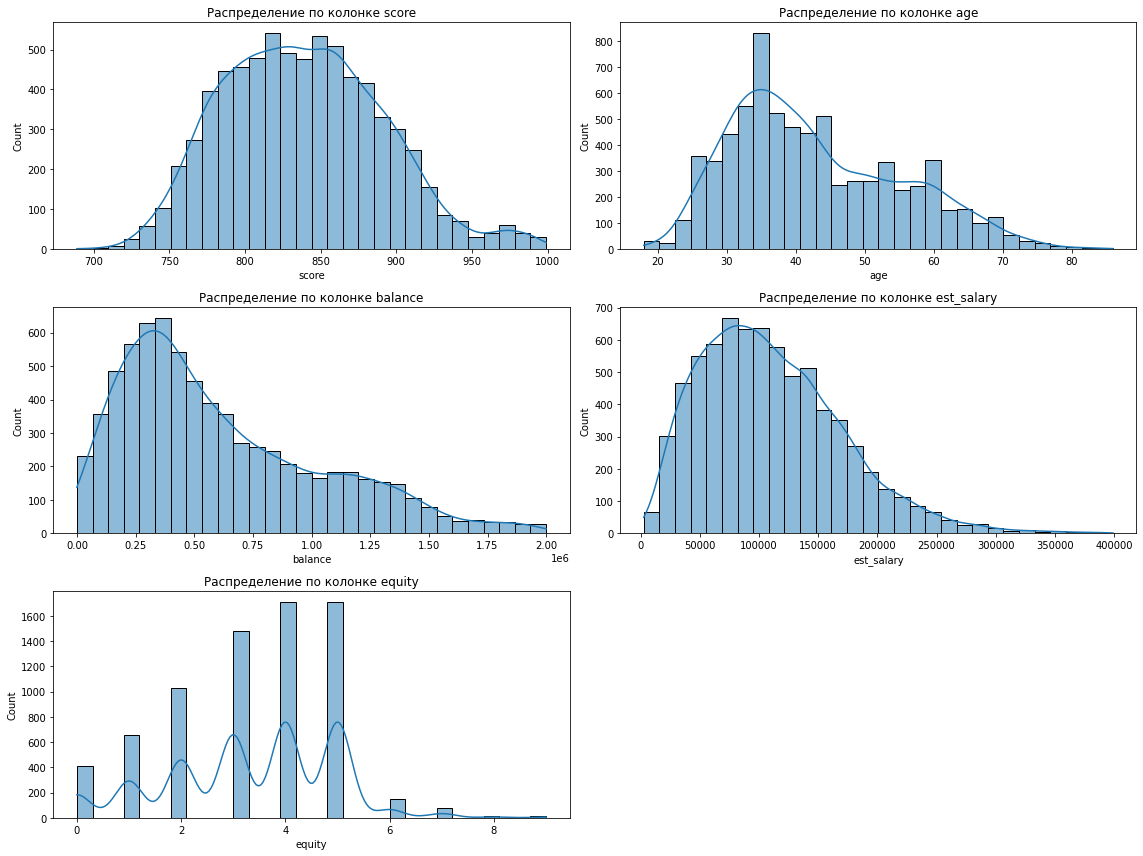

In [30]:
plt.figure(figsize=(16, 12))

for i, column in enumerate(['score', 'age', 'balance', 'est_salary', 'equity']):
    plt.subplot(3, 2, i+1)  
    sns.histplot(df_filtered[column], kde=True, bins=30)  
    plt.title(f'Распределение по колонке {column}') 

plt.tight_layout()
plt.show()

Исходя из графиков распределения непрерывных переменных, можно сделать некоторый вывод о среднем пользователе, но мы это сделаем на другом этапе анализа. Так, графики имеют вид нормальново распределения без аномалий, поэтому можем приступать к анализу оттока по непрерывным переменным.

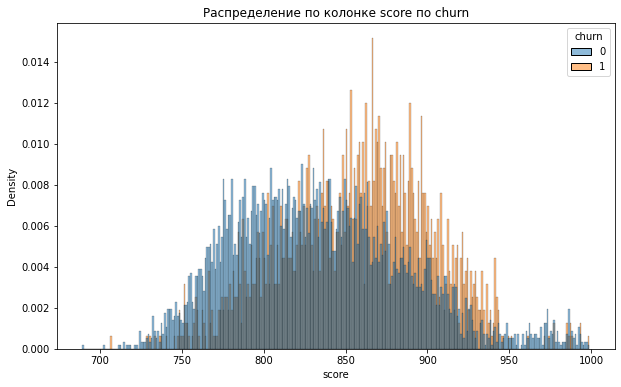

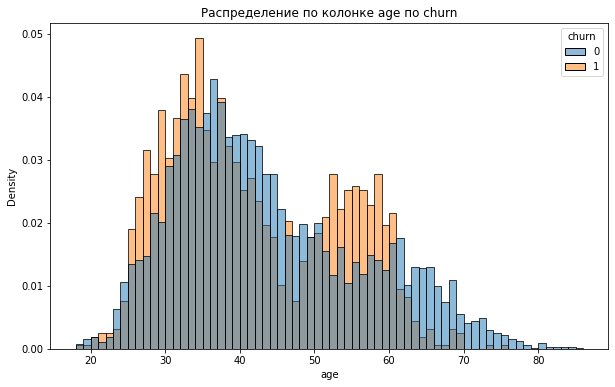

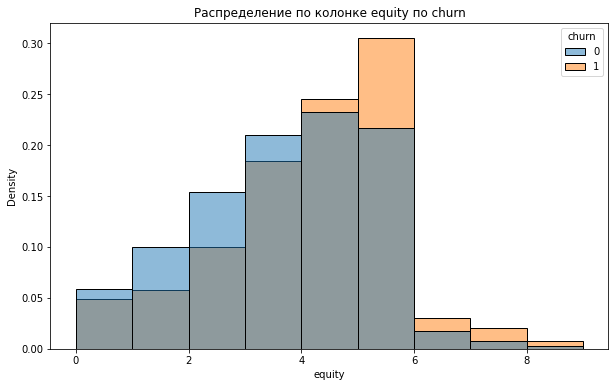

In [31]:
continuous_features = ['score', 'age', 'equity']
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_filtered, x=feature, hue='churn', stat="density", common_norm=False, binwidth=1)
    plt.title(f'Распределение по колонке {feature} по churn')
    plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


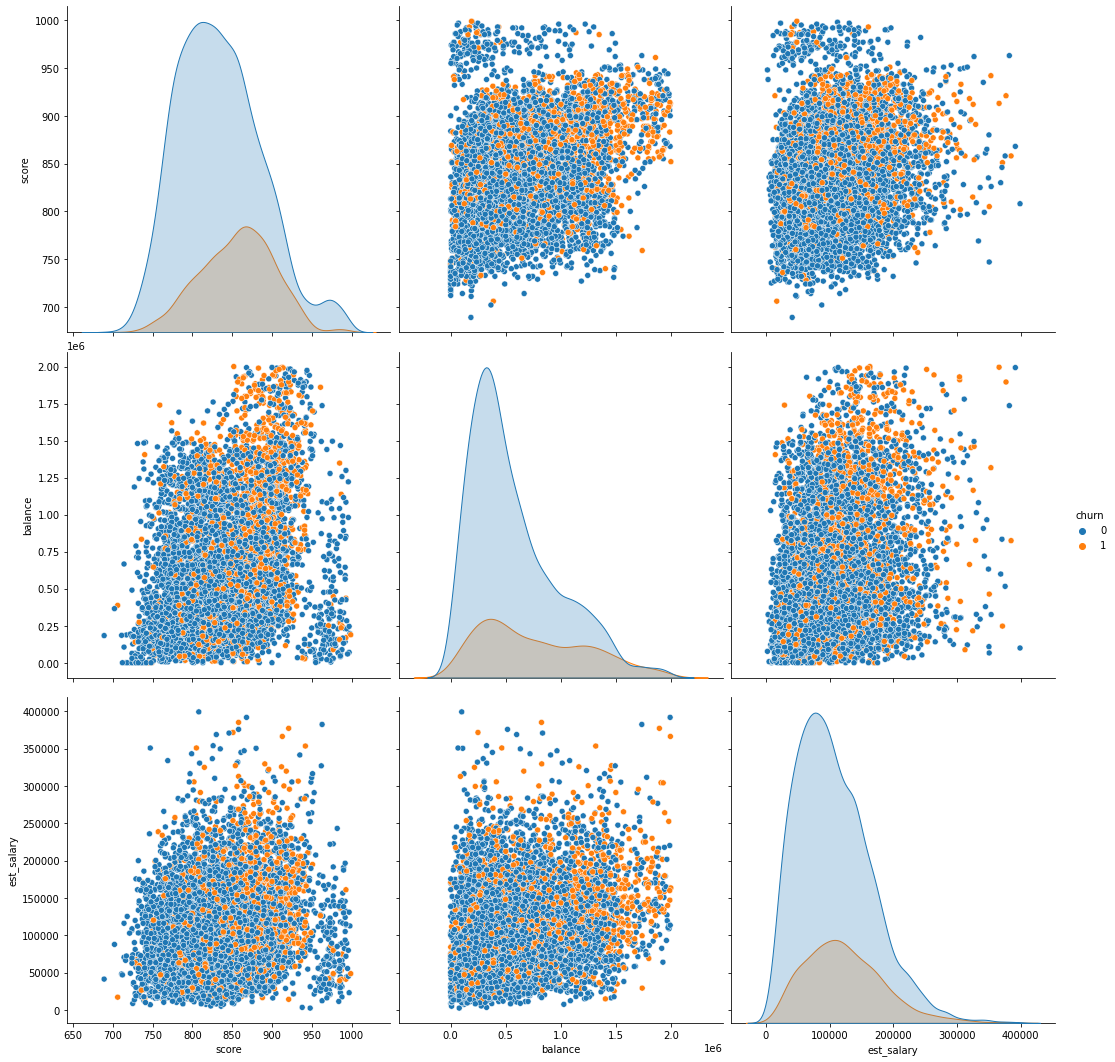

In [32]:
sns.pairplot(df_filtered[['score','balance','est_salary','churn']], hue='churn', size=5)
plt.show()

Как можно заметить, баланс и зарплата находятся на одном уровне оттока, то есть ушедшие и оставшиеся имеют похожий уровень баланса и дохода. Также, исходя из графиков, можно сделать вывод о том, что ушедшие пользователи имеют более высокий балл кредитного скоринга, балл собственности, а также клиенты в возрасте 50-60 лет имеют повышенный уровень оттока в сравнении с оставшимися в таком же возрасте.

Приступим к анализу категориальных признаков.

  #### Анализ категориальных признаков

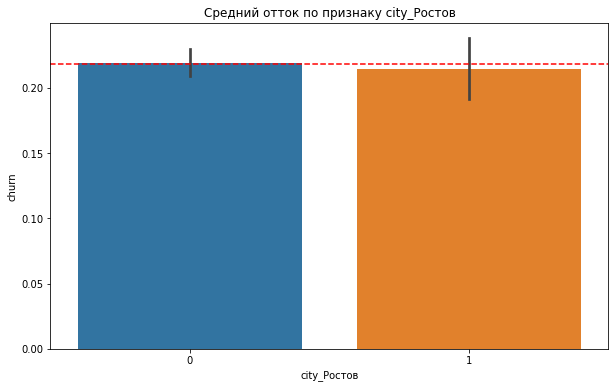

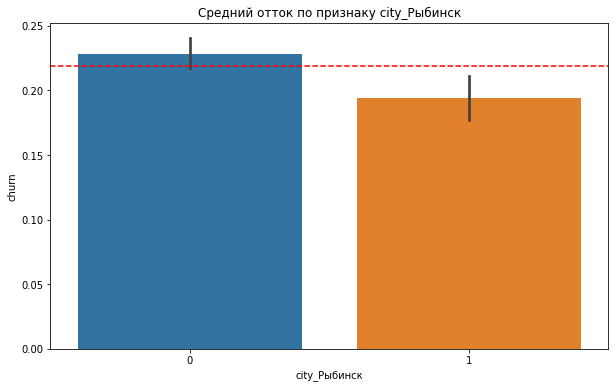

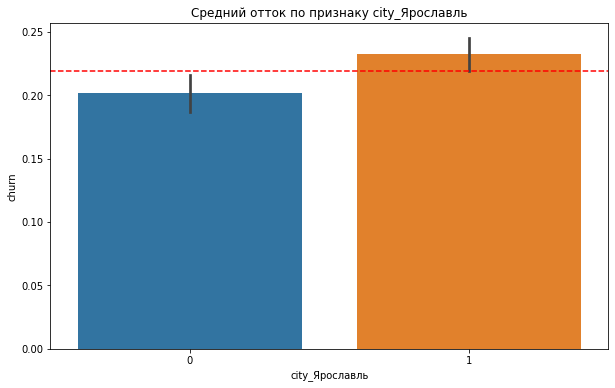

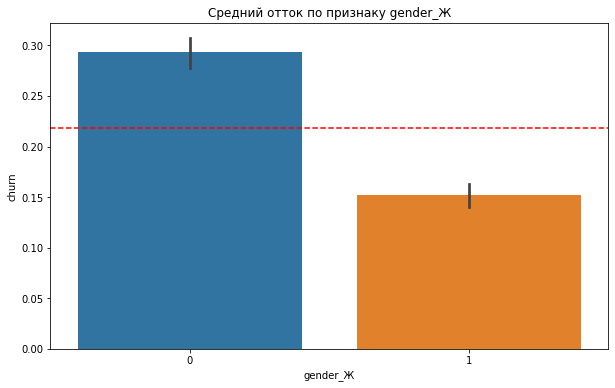

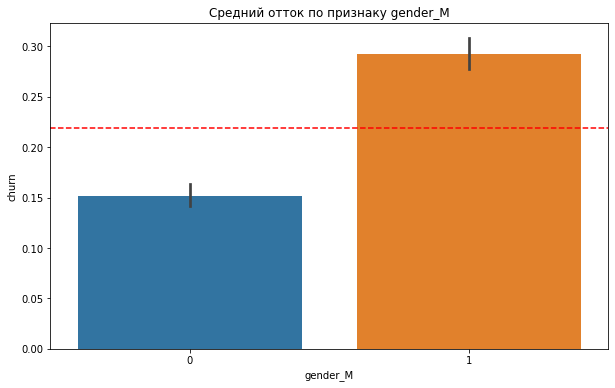

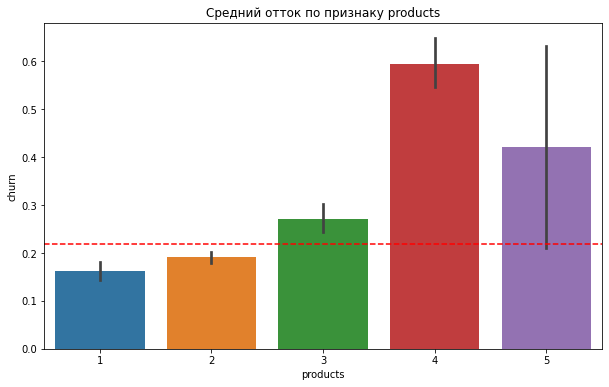

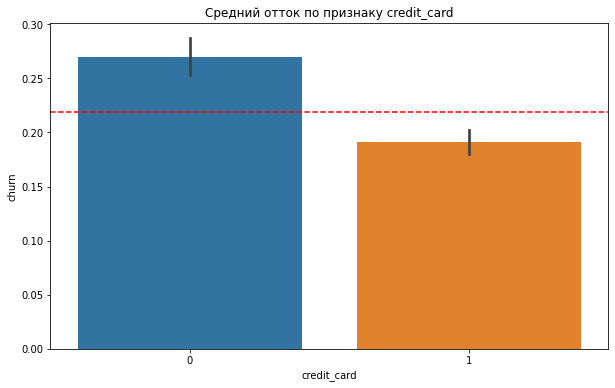

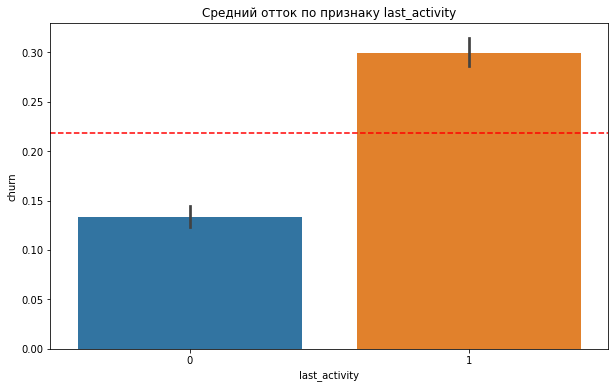

In [33]:
for feature in ['city_Ростов', 'city_Рыбинск', 'city_Ярославль', 'gender_Ж', 'gender_М', 'products', 'credit_card', 'last_activity']:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='churn', data=df_filtered)
    plt.axhline(df_filtered['churn'].mean(), color='red', linestyle='--')  # Линия среднего уровня оттока
    plt.title(f'Средний отток по признаку {feature}')
    plt.show()

Исходя из графиков по категориальным переменным, можно сказать, что **доля ушедших довольно высокая в Ярославле**, **среди мужчин также повышен средний уровень оттока**. У людей, **пользующихся 3 и более продуктами тоже довольно высокий уровень оттока**. **Пользователи, которые не имеют кредитных карт также более склонны к оттоку**, чем пользователи с кредиткой. Также на графике видно, что **активные пользователи больше склонны к оттоку**, что может показаться странным - потеря лояльных клиентов не очень хороший знак. 

Перейдем к следующему этапу анализа.

 #### Корреляционный анализ.

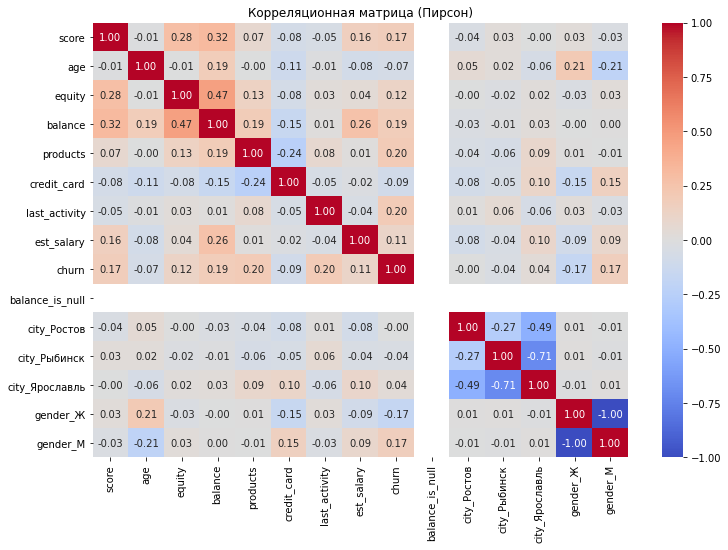

In [34]:
#  расчет корреляции Пирсона для всех признаков
corr_matrix = df_filtered.drop(columns=['user_id']).corr()

# визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Корреляционная матрица (Пирсон)')
plt.show()

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable balance_is_null for analysis 1. Dropping this column
  warnings.warn(


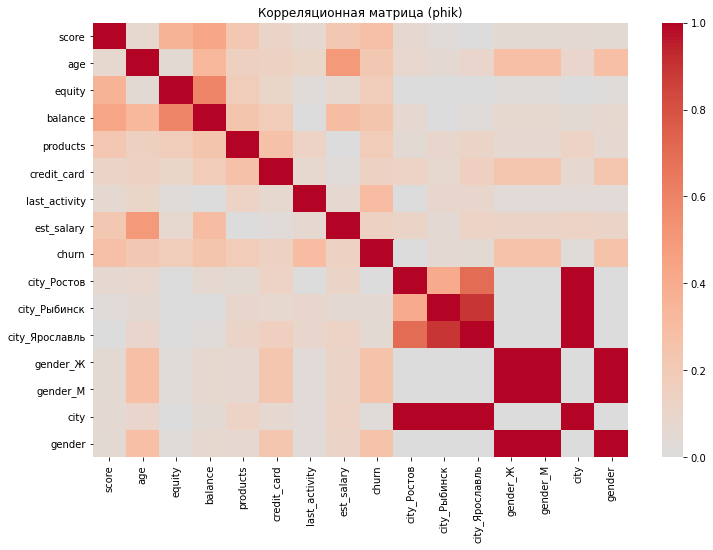

Корреляция с оттоком (phik):
churn             1.000000
last_activity     0.308982
score             0.279583
gender_Ж          0.263611
gender_М          0.263611
gender            0.263611
balance           0.244433
age               0.219632
products          0.189567
equity            0.172490
est_salary        0.141092
credit_card       0.139758
city_Рыбинск      0.054880
city_Ярославль    0.054330
city              0.022009
city_Ростов       0.000000
Name: churn, dtype: float64


In [35]:
# использование библиотеки phik
continuous_features = ['score', 'age', 'balance', 'est_salary']

# расчет корреляции phik
phik_matrix = df_filtered.drop(columns=['user_id']).phik_matrix(interval_cols=continuous_features)

# визуализация корреляционной матрицы phik
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица (phik)')
plt.show()

# фокус на корреляцию с оттоком
churn_corr_phik = phik_matrix['churn'].sort_values(ascending=False)
print("Корреляция с оттоком (phik):")
print(churn_corr_phik)

На графике с корреляцией Пирсона мы не видим устойчивых корреляций, лишь несколько признаков не очень сильно коррелируют друг с другом (balance и equity на 0.47, balance и score на 0.32), что нельзя назвать устойчивой связью. 

На графике с оттоком phik такая же картина.*(( но можно увидеть как user_id коррелирует с est_salary, городом Ростов и некоторых других переменных - не иначе, как нумерология, когда от цифры в id зависит доход. Какой-либо вывод делать из этого не стоит.))*

В таблице с корреляцией с оттоком мы также не видим устойчивых корреляций - наибольший коэфициент с переменной last_activity - около 0.31. Также переменные age, balance, gender, score имеют корреляцию выше 0.2. Природа таких коэфициентов сомнительна, поэтому ее стоит проверить. 

Перейдем к следующему разделу.

### Проверка статистических гипотез

  #### Формулировка гипотез

**Гипотеза 1:**

- *Нулевая гипотеза (H0)*: Средний балл кредитного скоринга клиентов, которые ушли, равен среднему баллу клиентов, которые остались.
- *Альтернативная гипотеза (H1)*: Средний балл кредитного скоринга клиентов, которые ушли, отличается от среднего балла клиентов, которые остались.

**Гипотеза 2:**

- *Нулевая гипотеза (H0)*: Вероятность ухода клиента не зависит от наличия кредитной карты.
- *Альтернативная гипотеза (H1)*: Вероятность ухода клиента зависит от наличия кредитной карты.

 #### Выбор инструментов для проверки гипотез

**Для гипотезы 1:** Проверка различий средних значений двух групп (ушли и остались) может быть проведена с использованием t-теста Стьюдента. Мы будем использовать двухвыборочный t-тест (независимые выборки), но предварительно проверим условия применения теста, такие как нормальность распределения и равенство дисперсий.
Если нормальность данных не подтвердится, мы будем использовать непараметрический тест Манна-Уитни.

**Для гипотезы 2:** Поскольку мы работаем с бинарными переменными, для проверки зависимости используем тест хи-квадрат, который хорошо подходит для анализа взаимосвязи категориальных переменных.

#### Проведение тестов и интерпретация результатов

Проверим первую гипотезу. Сперва нужно убедиться в нормальности распределения, прежде чем выбрать статтест.

In [35]:
# разделение данных на группы по признаку churn
churned = df_filtered[df_filtered['churn'] == 1]
not_churned = df_filtered[df_filtered['churn'] == 0]

# проверка на нормальность распределения
score_churned_normality = stats.shapiro(churned['score'])
score_not_churned_normality = stats.shapiro(not_churned['score'])

print('Проверка нормальности для ушедших клиентов:', score_churned_normality)
print('Проверка нормальности для оставшихся клиентов:', score_not_churned_normality)

# проверка равенства дисперсий
levene_test = stats.levene(churned['score'], not_churned['score'])
print('Проверка равенства дисперсий (тест Левена):', levene_test)

# если распределение нормальное и дисперсии равны, используем t-тест, иначе будем использовать тест Манна-Уитни
if score_churned_normality.pvalue > 0.05 and score_not_churned_normality.pvalue > 0.05 and levene_test.pvalue > 0.05:
    t_test = stats.ttest_ind(churned['score'], not_churned['score'], equal_var=True)
    print('Результат t-теста:', t_test)
else:
    mannwhitney_test = stats.mannwhitneyu(churned['score'], not_churned['score'])
    print('Результат теста Манна-Уитни:', mannwhitney_test)

Проверка нормальности для ушедших клиентов: ShapiroResult(statistic=0.9949632287025452, pvalue=3.566349914763123e-05)
Проверка нормальности для оставшихся клиентов: ShapiroResult(statistic=0.9812090992927551, pvalue=9.53537699190238e-27)
Проверка равенства дисперсий (тест Левена): LeveneResult(statistic=44.40750510160203, pvalue=2.862345372534958e-11)
Результат теста Манна-Уитни: MannwhitneyuResult(statistic=5701548.5, pvalue=1.2135422327843219e-61)


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Проверка нормальности для ушедших клиентов: ShapiroResult(statistic=0.9949632287025452, pvalue=3.566349914763123e-05)
Проверка нормальности для оставшихся клиентов: ShapiroResult(statistic=0.9812090992927551, pvalue=9.53537699190238e-27)
Проверка равенства дисперсий (тест Левена): LeveneResult(statistic=44.40750510160203, pvalue=2.862345372534958e-11)
Результат теста Манна-Уитни: MannwhitneyuResult(statistic=5701548.5, pvalue=1.2135422327843219e-61)


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Как мы видим, при таком распределении и дисперсии лучше использовать тест Манна-Уитни, в обоих случаях распределение далеко от нормального и проверка на равенство дисперсий показала существенные различия в дисперсии обоих групп. 
В данном случае лучше будет применить статтест Манна-Уитни, что мы и выполнили в результате полученных условий. 
Теперь подтвердим или опровергнем гипотезу. В данном случае лучше поставить уровень статистической значимости на уровне 5%, для проверки таких гипотез это стандартный уровень.

In [36]:
alpha = 0.05
if mannwhitney_test.pvalue < alpha:
    print('Отклоняем нулевую гипотезу: есть статистически значимые различия в кредитных скорингах.')
else:
    print('Не можем отклонить нулевую гипотезу: статистически значимых различий в кредитных скорингах нет.')

Отклоняем нулевую гипотезу: есть статистически значимые различия в кредитных скорингах.
Отклоняем нулевую гипотезу: есть статистически значимые различия в кредитных скорингах.


Опасения подтвердились, на графике из раздела 3.1 видно, что баллы кредитного скоринга выше у ушедших пользователей, дополнительно проверим гипотезу - в качестве **альтернативной гипотезы укажем, что у ушедших пользователей баллы кредитного скоринга больше.**  

In [37]:
mannwhitney_test = stats.mannwhitneyu(churned['score'], not_churned['score'], alternative = 'greater')
if mannwhitney_test.pvalue < alpha:
    print('Отклоняем нулевую гипотезу: есть статистически значимые различия в кредитных скорингах.')
else:
    print('Не можем отклонить нулевую гипотезу: статистически значимых различий в кредитных скорингах нет.')

Отклоняем нулевую гипотезу: есть статистически значимые различия в кредитных скорингах.
Отклоняем нулевую гипотезу: есть статистически значимые различия в кредитных скорингах.


Похоже, маркетингого отдела появилась задача - остановить отток наиболее кредитоспособных пользователей.

Перейдем к проверке другой гипотезы.

In [38]:
credit_card_table = pd.crosstab(df_filtered['credit_card'], df_filtered['churn'])

# Проведение теста хи-квадрат
chi2_stat, p_value, dof, expected = stats.chi2_contingency(credit_card_table)

# Вывод результатов
print('Результат теста хи-квадрат:')
print(f'Chi2 Statistic: {chi2_stat}, P-Value: {p_value}')

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print('Отклоняем нулевую гипотезу: наличие кредитной карты влияет на вероятность ухода клиента.')
else:
    print('Не можем отклонить нулевую гипотезу: наличие кредитной карты не влияет на вероятность ухода клиента.')

Результат теста хи-квадрат:
Chi2 Statistic: 58.7131948513517, P-Value: 1.8241407543275233e-14
Отклоняем нулевую гипотезу: наличие кредитной карты влияет на вероятность ухода клиента.
Результат теста хи-квадрат:
Chi2 Statistic: 58.7131948513517, P-Value: 1.8241407543275233e-14
Отклоняем нулевую гипотезу: наличие кредитной карты влияет на вероятность ухода клиента.


Вторая гипотеза тоже подвтердилась, наличие кредитной карты влияет на отток - пользователи без карты больше склонны к оттоку, чем пользователи с кредитной картой. Поэтому у маркетингого отдела ещё одна задача увеличить количество кредитных карт среди клиентов.

### Подведение промежуточных итогов

#### Суммирование результатов EDA:

На основе проведенного анализа выявлено несколько ключевых признаков, влияющих на отток клиентов:

- **Возраст**: клиенты в возрасте 50-60 лет демонстрируют повышенный уровень оттока по сравнению с другими возрастными группами.
- **Кредитный скоринг**: ушедшие пользователи имеют более высокий балл кредитного скоринга по сравнению с оставшимися клиентами, что указывает на необходимость анализа лояльности среди кредитоспособных клиентов.
- **Собственность (Equity)**: высокий балл собственности также коррелирует с оттоком, что требует внимания.
- **Категориальные признаки**: среди категорий клиентов, выделяются клиенты из города Ярославль, мужчины, пользователи, имеющие 3 и более продукта, а также клиенты без кредитных карт. Эти группы демонстрируют более высокий уровень оттока.

#### Выводы по результатам корреляционного анализа:

Корреляционный анализ показал слабые взаимосвязи между признаками. Наибольшие корреляции наблюдаются:

- **Balance и Equity**: Корреляция 0.47.
- **Balance и Score**: Корреляция 0.32.
- **Last Activity**: Наибольшая корреляция с оттоком, равная 0.31.

Несмотря на это, значительных корреляций между признаками не выявлено, что требует дополнительной проверки и анализа природы таких взаимосвязей.

#### Выводы по результатам гипотез:

Проведены статистические тесты для проверки двух гипотез:

1. **Гипотеза 1**: Существуют ли статистически значимые различия в баллах кредитного скоринга у клиентов, которые ушли, и тех, кто остался?
   - Результаты теста Манна-Уитни показали, что ушедшие клиенты имеют более высокие баллы кредитного скоринга.
   - Нулевая гипотеза была отклонена, что подтверждает значимость этого фактора.

2. **Гипотеза 2**: Влияет ли наличие кредитной карты на вероятность ухода клиента?
   - Тест хи-квадрат показал, что наличие кредитной карты влияет на отток клиентов. Клиенты без кредитной карты более склонны к оттоку.
   - Нулевая гипотеза была также отклонена, подтверждая значимость этого фактора.

**Итог:**

Основные признаки, которые лягут в основу сегментации: **возраст, кредитный скоринг, наличие кредитной карты, количество продуктов и активность клиента**. Это позволит разработать целевые мероприятия по удержанию клиентов, сконцентрированные на этих сегментах.

### Сегментация клиентов

   #### Разработка критериев сегментации

Для сегментации клиентов были выбраны ключевые признаки, влияющие на отток, которые мы определили в предыдущих этапах анализа. Эти признаки включают:

- **Возраст:** клиенты в возрасте 50-60 лет демонстрируют повышенный уровень оттока.
- **Кредитный скоринг:** ушедшие клиенты имеют более высокий балл кредитного скоринга.
- **Наличие кредитной карты:** клиенты без кредитной карты более склонны к оттоку.
- **Количество продуктов:** клиенты, использующие 3 и более продукта, имеют высокий уровень оттока.
- **Активность клиента:** активные клиенты имеют повышенный уровень оттока, что также требует учета при сегментации.

Мы будем ориентироваться на интервалы и значения этих признаков для выделения сегментов с повышенным уровнем оттока.

#### Проведение сегментации

Сперва подсчитаем количество клиентов и churn_rate для каждого сегмента.

In [39]:
segment_1 = df_filtered[(df_filtered['age'] >= 50) & (df_filtered['age'] <= 60) & (df_filtered['score'] > 700)]
segment_2 = df_filtered[(df_filtered['credit_card'] == 0) & (df_filtered['products'] >= 3)]
segment_3 = df_filtered[(df_filtered['last_activity'] == 1) & (df_filtered['equity'] > 4)]

segments = {
    'Segment 1': segment_1,
    'Segment 2': segment_2,
    'Segment 3': segment_3
}

segment_stats = []
for segment_name, segment_data in segments.items():
    total_clients = len(segment_data)
    churned_clients = segment_data['churn'].sum()
    churn_rate = churned_clients / total_clients * 100
    segment_stats.append({
        'Segment': segment_name,
        'Total Clients': total_clients,
        'Churned Clients': churned_clients,
        'Churn Rate (%)': churn_rate
    })

segment_stats_df = pd.DataFrame(segment_stats)

print(segment_stats_df)

     Segment  Total Clients  Churned Clients  Churn Rate (%)
0  Segment 1           1299              407       31.331794
1  Segment 2            718              211       29.387187
2  Segment 3           1042              431       41.362764
     Segment  Total Clients  Churned Clients  Churn Rate (%)
0  Segment 1           1299              407       31.331794
1  Segment 2            718              211       29.387187
2  Segment 3           1042              431       41.362764


Во всех трёх сегментах больше 500 человек, а также довольно большой churn rate - от 29 до 41%. Выполним визуализацию для наглядности.

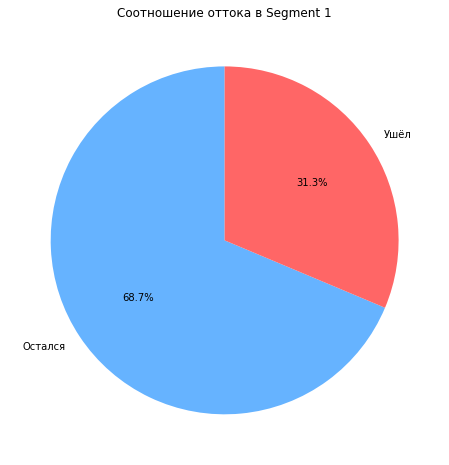

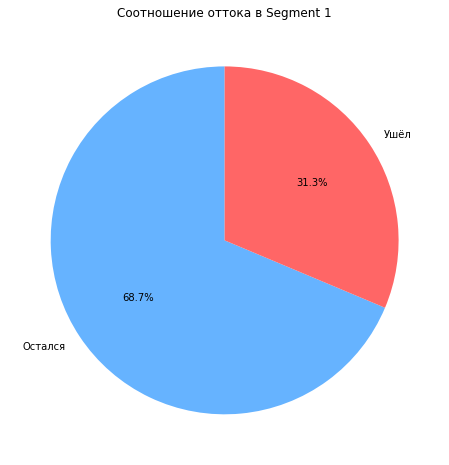

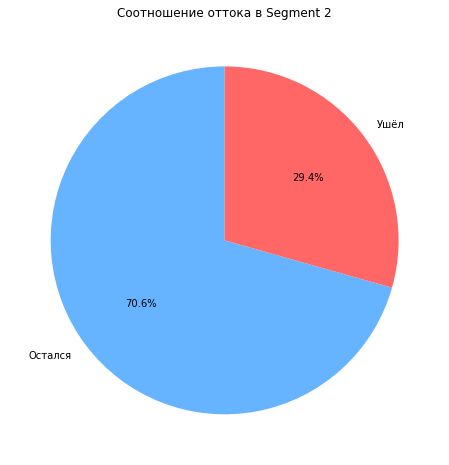

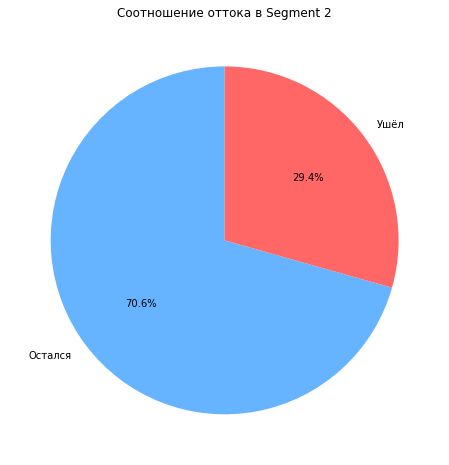

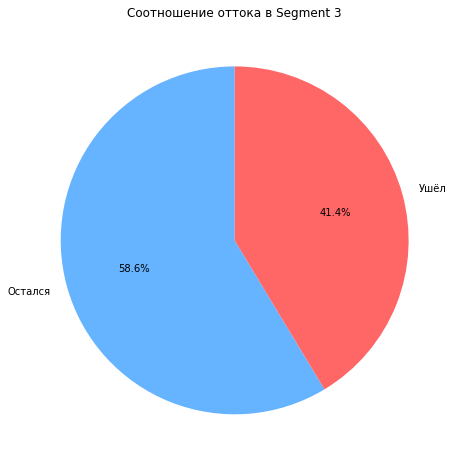

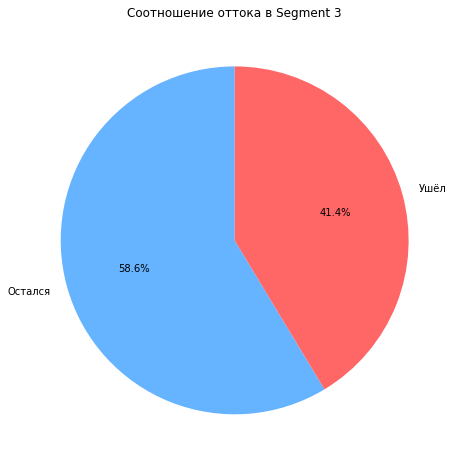

In [40]:
for segment_name, segment_data in segments.items():
    plt.figure(figsize=(8, 8))
    segment_data['churn'].value_counts().plot.pie(
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'], labels=['Остался', 'Ушёл']
    )
    plt.title(f'Соотношение оттока в {segment_name}')
    plt.ylabel('')  # Убираем ось y для круговой диаграммы
    plt.show()

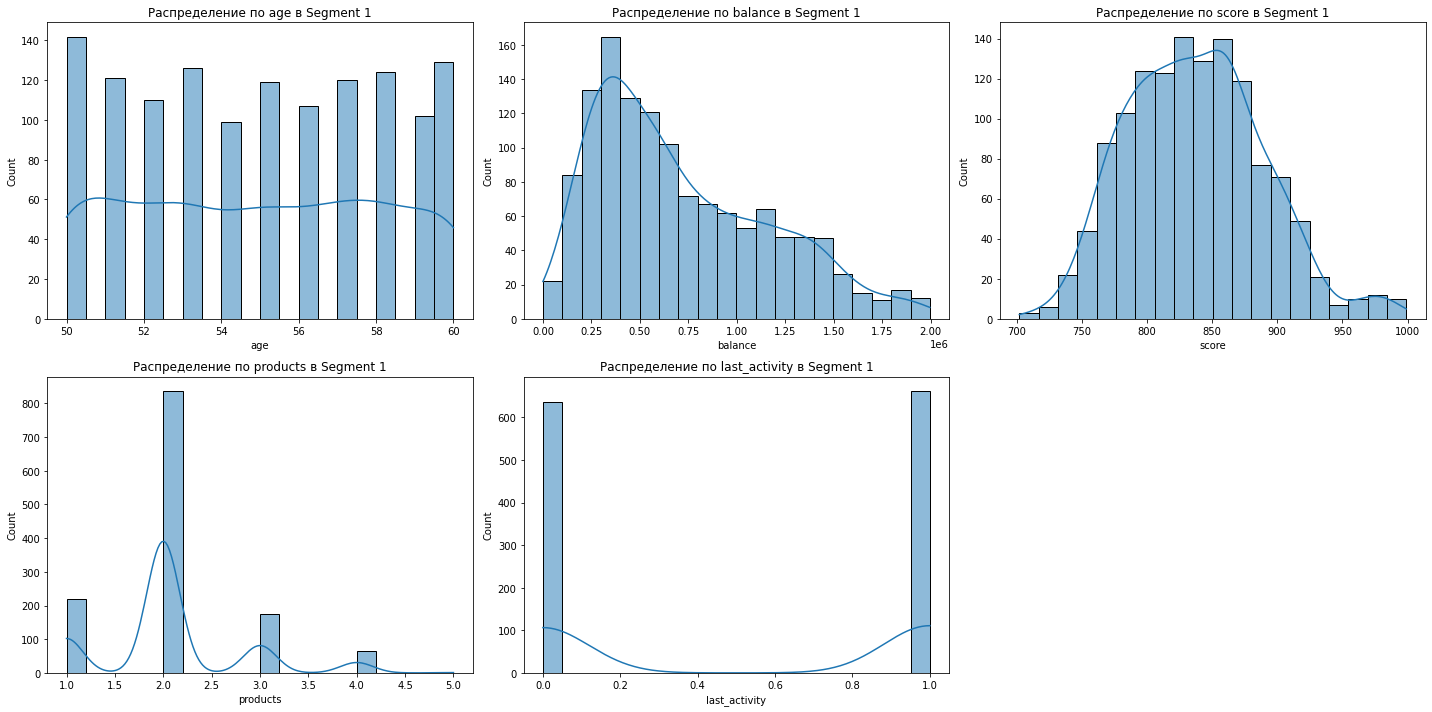

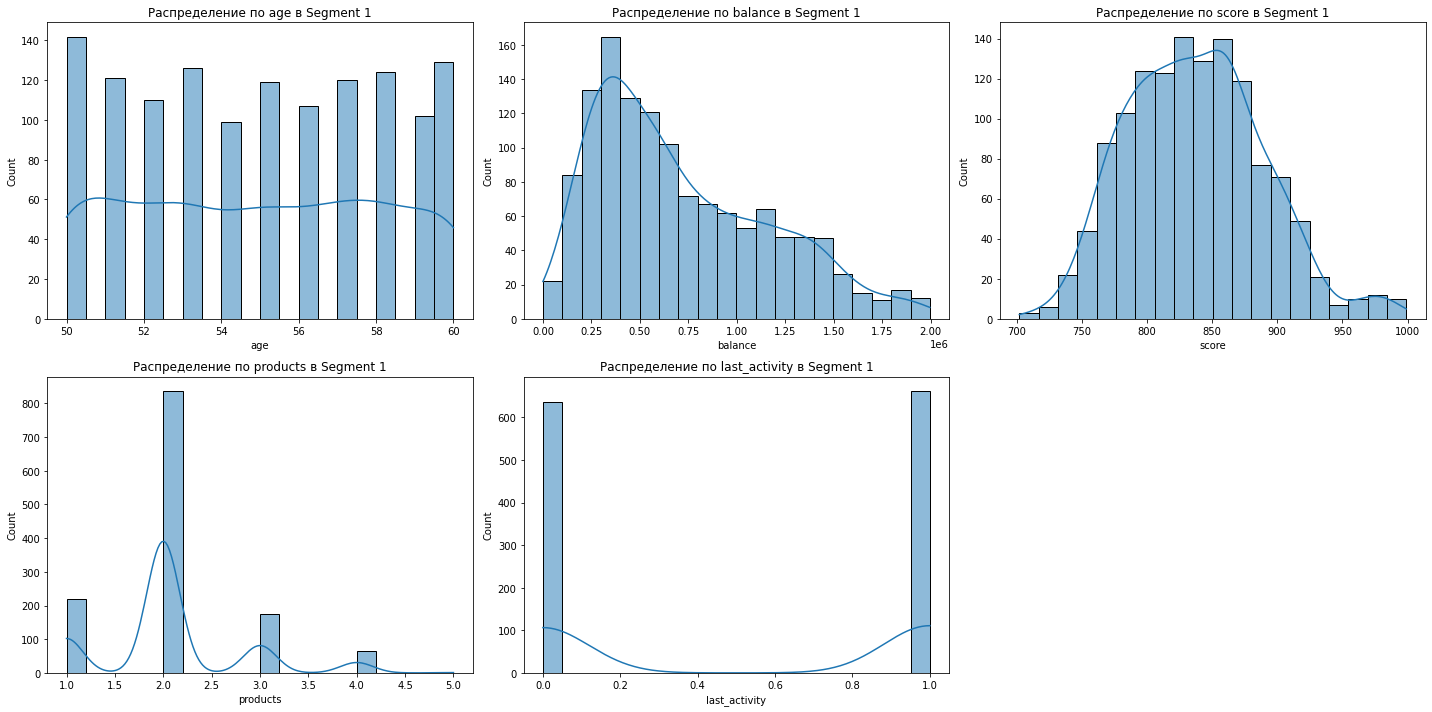

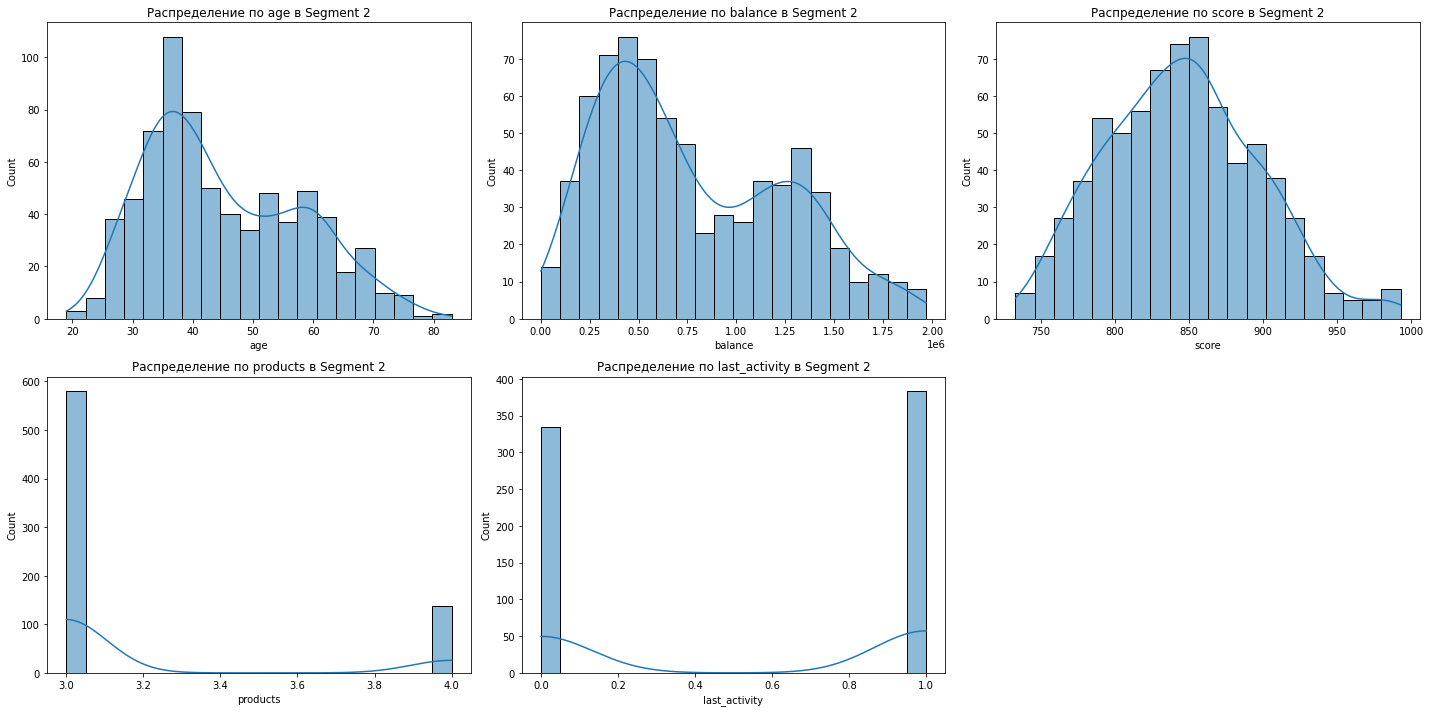

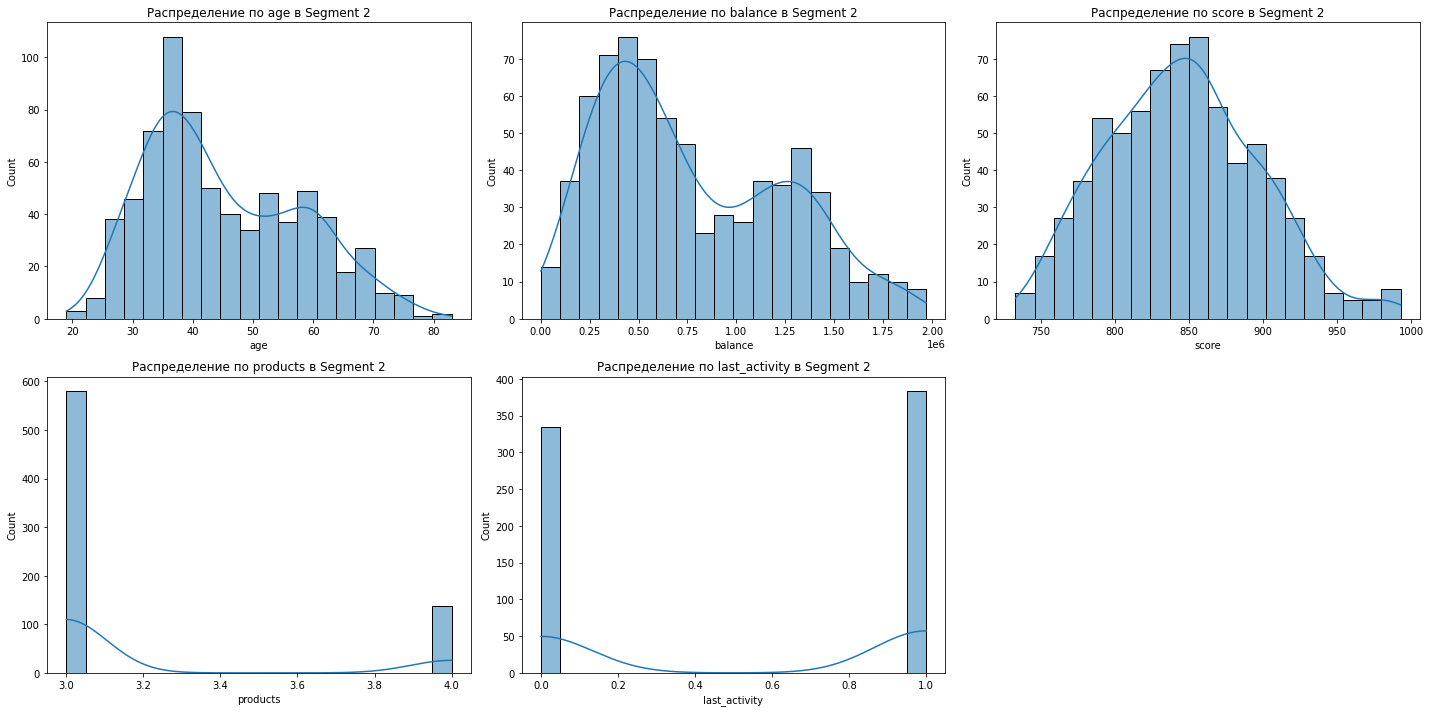

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


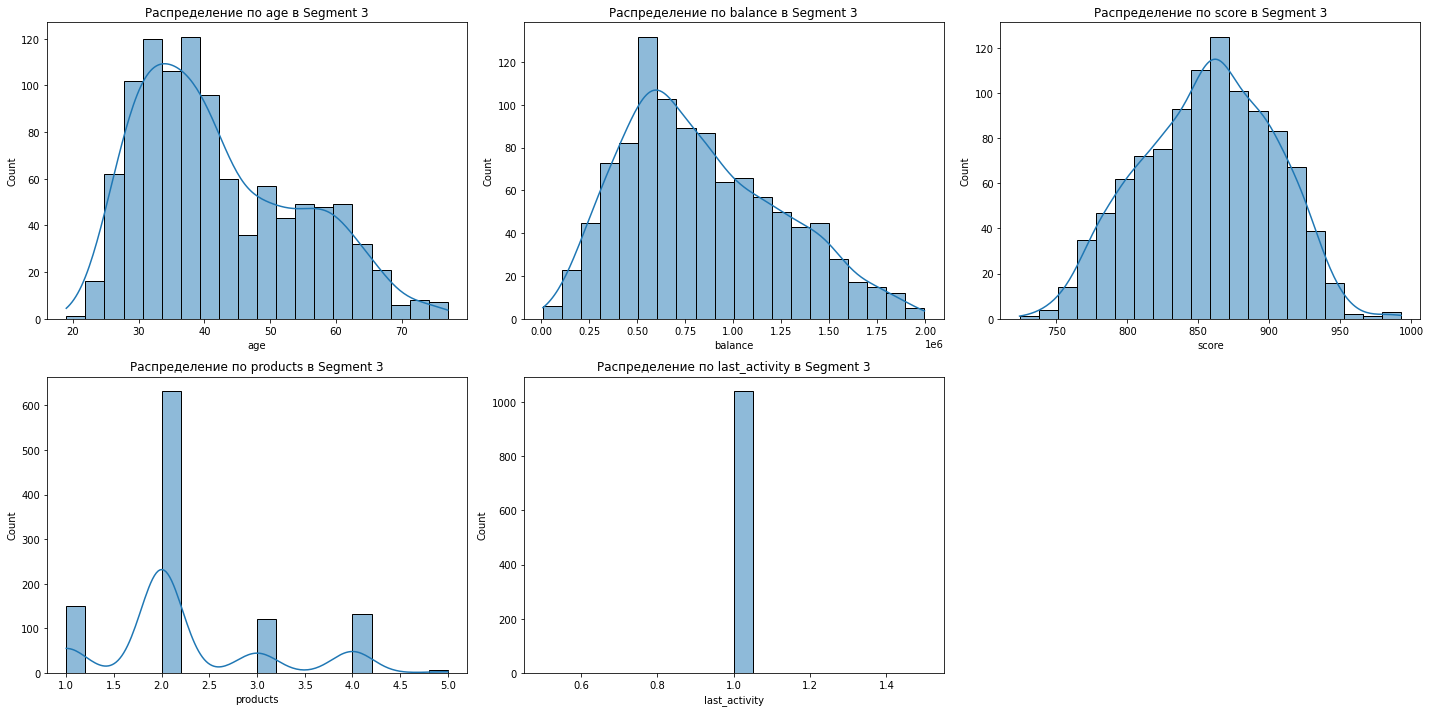

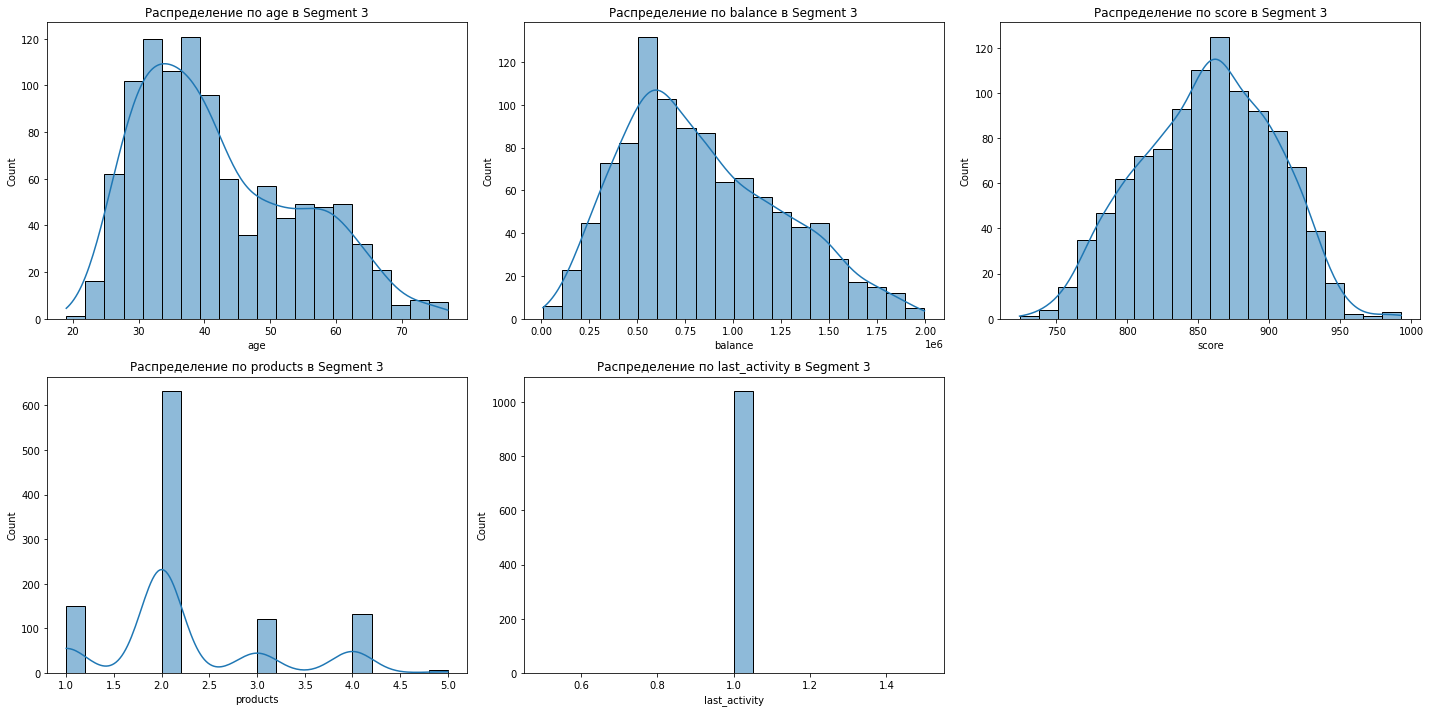

In [41]:
key_features = ['age', 'balance', 'score', 'products', 'last_activity']
for segment_name, segment_data in segments.items():
    plt.figure(figsize=(20, 10))
    for i, feature in enumerate(key_features):
        plt.subplot(2, 3, i + 1)
        sns.histplot(segment_data[feature], kde=True, bins=20)
        plt.title(f'Распределение по {feature} в {segment_name}')
    plt.tight_layout()
    plt.show()

Как можно заметить, в каждом сегменте уровень оттока выше среднебанковского (он составляет около 16%). Во всех сегментах мы не наблюдаем аномальных значений в распределениях, но можно заметить небольшую тенденцию - распределение баланса имеет бимодальный вид (по крайней мере во втором сегменте), что может говорить о том, что проблема оттока характерна как для пользователей с высоким, так и для пользователей с низким балансом.

В купе со всем вышесказанным, сегменты являются релевантными для дальнейшей приоритизации и рекомендаций для работы. Приступим к следующему этапу работы.

### Приоритизация сегментов

#### Оценка важности сегментов
1. **Сегмент 3**: содержит 1042 клиента, из которых 431 ушли, что составляет 41.36%. Этот сегмент требует наибольшего внимания, так как его уровень оттока выше среднего. Также в этом сегменте сосредоточены наиболее активные и состоятельные (в плане недвижимости) пользователи, что, безусловно, делает данный сегмент наиболее приоритетным, так как платёжеспособные и активные пользователи приносят высокую прибыль.
2. **Сегмент 1**: 1299 клиентов и 407 ушедших, что составляет 31.33%. Этот сегмент также важен, но менее критичен по сравнению с Сегментом 3. В этом сегменте тоже обладает наиболее платёжеспособной аудиторией.
3. **Сегмент 2**: содержит 718 клиентов, из которых 211 ушли, что составляет 29.39%. Хотя уровень оттока в этом сегменте ниже, он также требует внимания, но в последнюю очередь.

#### Причины приоритизации
- **Сегмент 3** должен стать приоритетом, так как имеет наибольший процент оттока. Важно сосредоточить усилия маркетинга на удержании клиентов из этого сегмента.
- **Сегмент 1** с более высоким количеством клиентов может также дать значительный вклад в снижение оттока, несмотря на более низкий процент по сравнению с Сегментом 3.
- **Сегмент 2** рассматривается в последнюю очередь, так как он имеет самый низкий уровень оттока среди выделенных сегментов.

Теперь можно составить план дальнейших действий по каждому из сегментов, уделив первоочередное внимание Сегменту 3.

###  Формирование рекомендаций

#### Разработка таргетированных рекомендаций

**Рекомендации для сегментов:**

1. **Segment 1 (1299 клиентов, 31.33% отток):**
   - **Особенности сегмента:** этот сегмент характеризуется относительно высокой финансовой активностью и значительным уровнем дохода. Клиенты в этом сегменте пользуются несколькими продуктами (2 и более), но их интерес к продуктам банка может снижаться из-за недостатка персонализированного обслуживания - немаловажный фактор тут играет и возраст, наиболее взрослые и платежеспособные пользователи чаще всего нуждаются в персональном обслуживании.
   - **Рекомендации:**
     - **Персонализированное обслуживание:** внедрить индивидуальные предложения и программу лояльности, основанную на анализе использования продуктов каждым клиентом.
     - **Дополнительные продукты:** подготовить специальную линейку продуктов, ориентированную на клиентов с более высоким доходом и возрастом, например, премиальные кредитные карты или инвестиционные услуги.
     - **Повышение вовлеченности:** организовать мероприятия для повышения лояльности, такие как консультации по финансовому планированию или улучшение сервиса оффлайн-банкинга.

2. **Segment 2 (718 клиентов, 29.39% отток):**
   - **Особенности сегмента:** в данном сегменте наблюдается высокая концентрация клиентов среднего возраста, которые активно пользуются другими базовыми банковскими продуктами и не пользуются кредитными картами - уровень оттока остается высоким из-за недостаточной информированности о дополнительных возможностях банка.
   - **Рекомендации:**
     - **Образовательные программы:** внедрить программу повышения финансовой грамотности для данной возрастной категории, акцентируя внимание на возможностях более выгодного использования продуктов банка.
     - **Кросс-продажи:** активизировать предложения сопутствующих продуктов, таких как страховые услуги или депозиты, через персонализированные рассылки и консультации.
     - **Увеличение кредитных лимитов:** пересмотреть лимиты по кредитным картам для активных клиентов и предложить индивидуальные предложения.

3. **Segment 3 (1042 клиента, 41.36% отток):**
   - **Особенности сегмента:** наибольший отток в этом сегменте указывает на возможные проблемы с удовлетворенностью клиентов. Здесь представлены активные пользователи с высоким баллом собственности однако, возможно, они не получают должного уровня сервиса или заинтересованности со стороны банка.
   - **Рекомендации:**
     - **Улучшение сервиса:** внедрить систему быстрых ответов на запросы клиентов и повысить уровень поддержки для клиентов этого сегмента.
     - **Анкетирование:** провести исследование удовлетворенности клиентов для выявления причин их неудовлетворенности и незамедлительное устранение выявленных проблем.
     - **Вознаграждения за лояльность:** запустить программу вознаграждений для тех клиентов, кто продолжает пользоваться услугами банка более года.

#### Представление рекомендаций

Ссылка на презентацию: https://disk.yandex.ru/i/4Y6J3yR--CQG5A